In [13]:
# Read the data from the file q-gdpmc1.txt
data <- read.table("q-gdpmc1.txt", header = TRUE)

# Add log transformation of GDP per capita to data
data$log_gdp <- log(data$gdp)

# Add first differencing of log GDP per capita to data
data$growth_rate <- c(NA, diff(data$log_gdp))

#Display the first few rows of the data
print(head(data))

  year month day     gdp  log_gdp   growth_rate
1 1947     1   1 1770691 14.38688            NA
2 1947     4   1 1767976 14.38535 -0.0015344764
3 1947     7   1 1766523 14.38452 -0.0008221816
4 1947    10   1 1793310 14.39957  0.0150498664
5 1948     1   1 1821809 14.41534  0.0157668892
6 1948     4   1 1855345 14.43358  0.0182406991


In [14]:
data$date <- as.Date(with(data, paste(year, month, "01", sep="-")), "%Y-%m-%d")
head(data)

,year,month,day,gdp,log_gdp,growth_rate,date
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<date>
1,1947,1,1,1770691,14.38688,NA,1947-01-01
2,1947,4,1,1767976,14.38535,-0.0015344764,1947-04-01
3,1947,7,1,1766523,14.38452,-0.0008221816,1947-07-01
4,1947,10,1,1793310,14.39957,0.0150498664,1947-10-01
5,1948,1,1,1821809,14.41534,0.0157668892,1948-01-01
6,1948,4,1,1855345,14.43358,0.0182406991,1948-04-01


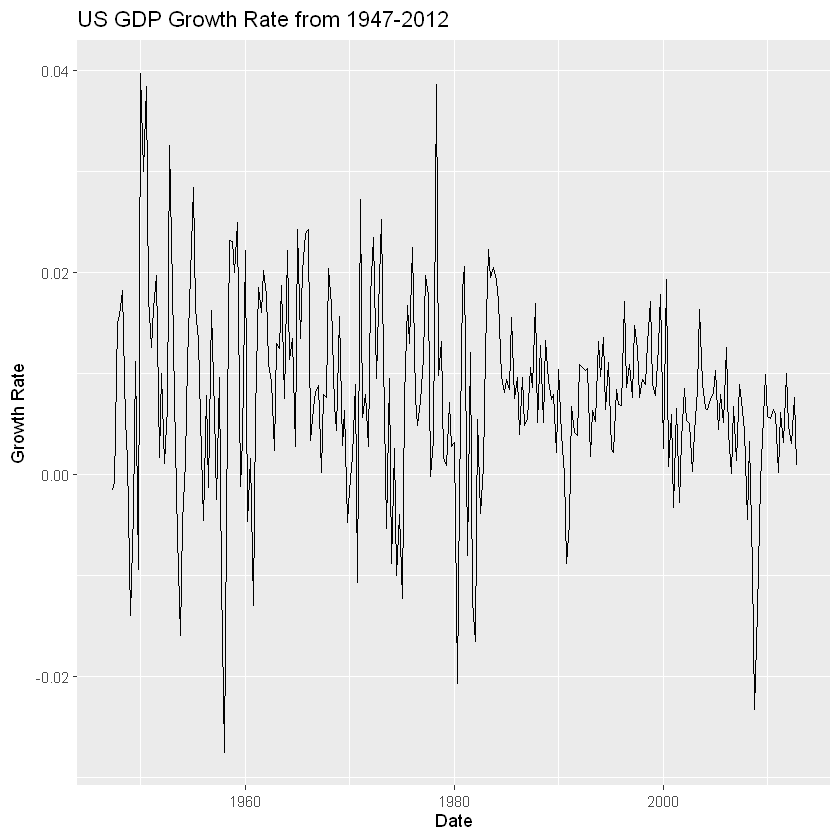

In [15]:
library(ggplot2)

# Remove the first row of the data to avoid plotting NA values
ggplot(data[-1,], aes(x = date, y = growth_rate)) +
  geom_line() +
  labs(title = "US GDP Growth Rate from 1947-2012", x = "Date", y = "Growth Rate")

In [16]:
# Perform the Ljung-Box test for the first 12 lags
ljung_box_test <- Box.test(data$growth_rate, lag = 12, type = "Ljung-Box")

# Print the test result
print(ljung_box_test)


	Box-Ljung test

data:  data$growth_rate
X-squared = 64.259, df = 12, p-value = 3.737e-09



In [17]:
# Perform the t-test 
t_test_result <- t.test(data$growth_rate, mu = 0, conf.level = 0.99)

# Print the t-test result
print(t_test_result)


	One Sample t-test

data:  data$growth_rate
t = 12.786, df = 262, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
99 percent confidence interval:
 0.006193171 0.009346756
sample estimates:
  mean of x 
0.007769964 



In [18]:
# Load necessary library
library(stats)

# Fit an AR model to the growth rate series using MLE
ar_model <- ar(na.omit(data$growth_rate), method = "mle")

# Extract and print the order of the AR model
ar_order <- ar_model$order
cat(ar_order)

[1] 3
